# About This Notebook

### Import Libraries

In [342]:
import pandas as pd
import numpy as np

# Importing Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
from nltk import FreqDist, pos_tag
from nltk.tokenize import word_tokenize
from collections import Counter

# Scikit Libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

### Read in Data

In [343]:
wine = pd.read_csv('../data/wine.csv', )

In [344]:
beer = pd.read_csv('../data/beer.csv')

In [345]:
wine.head()

,title,selftext,subreddit
0,Resources for a newbie home winemaker,Resources for a newbie home winemaker I want t...,winemaking
1,A question about kit wine,A question about kit wine I’ve made quite a fe...,winemaking
2,Riesling - My First Wine,"Riesling - My First Wine Hi Everyone,\n\nI am ...",winemaking
3,Persimmon Wine Straining?,Persimmon Wine Straining? Hello! This is my fi...,winemaking
4,Wire used for Trellis,Wire used for Trellis Hey all - I'm planting s...,winemaking


In [346]:
beer.head()

,title,selftext,subreddit
0,Sitrep Monday,"Sitrep Monday You've had a week, what's your s...",Homebrewing
1,"Daily Q &amp; A! - December 28, 2020","Daily Q &amp; A! - December 28, 2020 Welcome t...",Homebrewing
2,Boosting ABV with table sugar,Boosting ABV with table sugar I’ve read about ...,Homebrewing
3,Is this pellicile or yeast?,Is this pellicile or yeast? For some backgroun...,Homebrewing
4,Using blowoff tube instead of airlock for carboy?,Using blowoff tube instead of airlock for carb...,Homebrewing


Dropping title column from both DFs. The text from the column has already been merged to selftext in the previous notebook. 

In [347]:
wine.drop(columns = 'title', inplace = True)

In [348]:
beer.drop(columns = 'title', inplace = True)

In [349]:
wine.columns

Index(['selftext', 'subreddit'], dtype='object')

In [350]:
beer.columns

Index(['selftext', 'subreddit'], dtype='object')

# Concatenating 
wine and beer dataframes into one df on the row index 

In [351]:
posts_df = pd.concat([wine, beer], ignore_index = True)

Saving posts_df to CSV

In [352]:
posts_df.to_csv('../data/wine_beer_concatenated.csv', index = False)

In [23]:
posts_df.head()

,selftext,subreddit
0,Resources for a newbie home winemaker I want t...,winemaking
1,A question about kit wine I’ve made quite a fe...,winemaking
2,"Riesling - My First Wine Hi Everyone,\n\nI am ...",winemaking
3,Persimmon Wine Straining? Hello! This is my fi...,winemaking
4,Wire used for Trellis Hey all - I'm planting s...,winemaking


In [24]:
posts_df.tail()

,selftext,subreddit
4297,"Any input on this recipe 6 lb - Pale Malt, Mar...",Homebrewing
4298,"Bottling Tepache Hello brewers, \n\na couple d...",Homebrewing
4299,Wiring a spa panel for ebiab gfi I've been all...,Homebrewing
4300,What can I ferment at 60-65°F? The basement in...,Homebrewing
4301,Does a decoction mash with wheat leave a bread...,Homebrewing


### Expanding Contractions
* The code for this section has been adapted from this article in Towards Data Science. 
* https://towardsdatascience.com/preprocessing-text-data-using-python-576206753c28


Creating a new column 'no_contraction'.
* by applying a lambda function to 'selftext' column that takes in a word from a post in a series that has been split.
* if the word is a contraction it converts it to two words using the **fix function** from the **Contrations Library** imported above. 

In [25]:
posts_df['no_contraction'] = posts_df['selftext'].apply(lambda x: 
[contractions.fix(word) for word in x.split()])

Converting the lists in 'no_contraction' series back to string objects. 
* creating a list comprehension that joins mappings of str conversions to a list for every list in 'no_contraction' series. 

In [26]:
posts_df['no_contraction_str'] = [' '.join(map(str, l)) for l in posts_df['no_contraction']]

In [27]:
posts_df.head()

,selftext,subreddit,no_contraction,no_contraction_str
0,Resources for a newbie home winemaker I want t...,winemaking,"[Resources, for, a, newbie, home, winemaker, I...",Resources for a newbie home winemaker I want t...
1,A question about kit wine I’ve made quite a fe...,winemaking,"[A, question, about, kit, wine, I have, made, ...",A question about kit wine I have made quite a ...
2,"Riesling - My First Wine Hi Everyone,\n\nI am ...",winemaking,"[Riesling, -, My, First, Wine, Hi, Everyone,, ...","Riesling - My First Wine Hi Everyone, I am goi..."
3,Persimmon Wine Straining? Hello! This is my fi...,winemaking,"[Persimmon, Wine, Straining?, Hello!, This, is...",Persimmon Wine Straining? Hello! This is my fi...
4,Wire used for Trellis Hey all - I'm planting s...,winemaking,"[Wire, used, for, Trellis, Hey, all, -, I am, ...",Wire used for Trellis Hey all - I am planting ...


Make 'selftext' column the 'no_contraction_str' column

In [28]:
posts_df['selftext'] = posts_df['no_contraction_str']

### Create new 'posts_nc' DataFrame 
* that does not contain contractions. 

In [29]:
posts2 = posts_df.drop(columns = ['no_contraction', 'no_contraction_str'])

In [30]:
posts2.head()

,selftext,subreddit
0,Resources for a newbie home winemaker I want t...,winemaking
1,A question about kit wine I have made quite a ...,winemaking
2,"Riesling - My First Wine Hi Everyone, I am goi...",winemaking
3,Persimmon Wine Straining? Hello! This is my fi...,winemaking
4,Wire used for Trellis Hey all - I am planting ...,winemaking


In [31]:
posts2.tail()

,selftext,subreddit
4297,"Any input on this recipe 6 lb - Pale Malt, Mar...",Homebrewing
4298,"Bottling Tepache Hello brewers, a couple days ...",Homebrewing
4299,Wiring a spa panel for ebiab gfi I have been a...,Homebrewing
4300,What can I ferment at 60-65°F? The basement in...,Homebrewing
4301,Does a decoction mash with wheat leave a bread...,Homebrewing


# Parts of Speech Analysis

Create a list of posts to be tokenized

In [144]:
post_text = list(posts2['selftext'])

Tokenize using NLTK word tokenizer

In [145]:
post_tokens = [word_tokenize(i) for i in post_text]

Part-of-Speech tagging using Penn Treebank tags

In [146]:
tagged_posts = [pos_tag(i) for i in post_tokens]

Create a Part of Speech dictionary for the dataframe, lined up with the index positiosn of the messages

In [147]:
pos_dict = {}

for i in range(len(post_text)):
    pos_dict[i] = dict(Counter(tag for word, tag in tagged_spam[i]))

Create a transposed dataframe

In [148]:
pos_df_1 = pd.DataFrame(pos_dict)

In [149]:
pos_df = pd.DataFrame(pos_dict).T

In [150]:
pos_df.head()

,NNS,IN,DT,JJ,NN,PRP,VBP,TO,VB,(,...,NNPS,$,``,'',#,FW,RBS,UH,SYM,WP$
0,9.0,9.0,11.0,8.0,17.0,8.0,6.0,9.0,12.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,8.0,10.0,4.0,7.0,11.0,4.0,2.0,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,14.0,13.0,12.0,21.0,13.0,7.0,7.0,11.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,13.0,15.0,12.0,21.0,12.0,4.0,2.0,8.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0,15.0,14.0,9.0,18.0,9.0,6.0,3.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Creating a list of word totals for entire part of speech dataframe.
* Adding a total_words column to part of speech dataframe

In [153]:
pos_df['total_words'] = [pos_df.iloc[row, :].sum() for row in pos_df.index]

getting the mean amount of words for posts in all subbreddits

In [125]:
pos_df['total_words'].mean()

124.3212459321246

adding a subreddit column to part of speech dataframe

In [126]:
pos_df['subreddit'] = posts2['subreddit']

The mean number of each part of speech grouped by subreddit. 

In [127]:
pos_mean = pos_df.groupby('subreddit').mean()
pos_mean

,NNS,IN,DT,JJ,NN,PRP,VBP,TO,VB,(,...,$,``,'',#,FW,RBS,UH,SYM,WP$,total_words
subreddit,,,,,,,,,,,,,,,,,,,,,
Homebrewing,4.790883,11.930769,10.661132,8.235755,20.015651,8.711731,4.613054,3.739488,5.905501,2.221811,...,1.669492,1.481675,1.669388,2.224299,2.743590,1.070423,1.019608,3.0,1.0,131.159273
winemaking,4.989565,10.878549,9.296060,7.861423,17.020704,8.356334,4.499139,3.591824,6.038251,1.834522,...,1.409836,1.435644,1.474138,2.223529,1.220779,1.113208,1.200000,1.5,1.0,115.956589


Total words (parts of speech) per post grouped by subreddit

In [128]:
pos_mean['total_words']

subreddit
Homebrewing    131.159273
winemaking     115.956589
Name: total_words, dtype: float64

In [156]:
ttl_words_home = pos_mean['total_words'][0]
ttl_words_home

131.15927334178284

In [157]:
ttl_words_wine = pos_mean['total_words'][1]
ttl_words_wine

115.95658914728682

 
* The Homebrew subreddit is six percent larger than winemaking in terms of the number of parts of speech per post.


In [158]:
pos_mean_dif = (ttl_words_home - ttl_words_wine) / (ttl_words_home + ttl_words_wine) 
pos_mean_dif

0.061520470767709036

In [129]:
#Transposing pos_mean dataframe
pos_mean_t = pos_mean.T
pos_mean_t.head()

subreddit,Homebrewing,winemaking
NNS,4.790883,4.989565
IN,11.930769,10.878549
DT,10.661132,9.296060
JJ,8.235755,7.861423
NN,20.015651,17.020704


Creating two variables
* one adds the two pos count values
* the other subtracts the two pos count values
* these will be used to create a column that details the percentage difference between each subreddit for each respective POS

In [130]:
total_count_pos = (pos_mean_t['Homebrewing'] + pos_mean_t['winemaking'])
sub_pos = (pos_mean_t['Homebrewing'] - pos_mean_t['winemaking'])

Creating a column that details the percentage of pos

In [131]:
pos_mean_t['perc_diff'] = sub_pos / total_count_pos                              

In [162]:
pos_mean_t.head()

subreddit,Homebrewing,winemaking,perc_diff
NNS,4.790883,4.989565,-0.020314
IN,11.930769,10.878549,0.046131
DT,10.661132,9.296060,0.068400
JJ,8.235755,7.861423,0.023254
NN,20.015651,17.020704,0.080865


#### Identifying High POS differentials between the two subreddits
* four parts of speech have a percentage difference of greater than 10 percent between the two subreddits.
* All 
* NNP is (Noun, proper, singular).
* CD is numeral, cardinal (likely due to the amount of discussion of temperature and degrees. 
* FW is foreign word
* SYM is symbol.

These all could be parts of speech that could differentiate between the two subreddits but the FW and SYM may need to be cleaned out. 

In [140]:
pos_mean_t[pos_mean_t['perc_diff'] > .10]

subreddit,Homebrewing,winemaking,perc_diff
NNP,7.387593,4.814997,0.210824
CD,5.122054,3.815835,0.146144
FW,2.743590,1.220779,0.384124
SYM,3.000000,1.500000,0.333333


In [161]:
# This code will show the POS tag definitions.
# nltk.help.upenn_tagset()

# Preprocessing with Count Vectorizer
* This will convert text data into structured, numeric data. 
* It does this by counting how many times a token is observed in a given document and then creates a column (vector) that stores those counts. 

In [164]:
posts_df.head()

,selftext,subreddit,no_contraction,no_contraction_str
0,Resources for a newbie home winemaker I want t...,winemaking,"[Resources, for, a, newbie, home, winemaker, I...",Resources for a newbie home winemaker I want t...
1,A question about kit wine I have made quite a ...,winemaking,"[A, question, about, kit, wine, I have, made, ...",A question about kit wine I have made quite a ...
2,"Riesling - My First Wine Hi Everyone, I am goi...",winemaking,"[Riesling, -, My, First, Wine, Hi, Everyone,, ...","Riesling - My First Wine Hi Everyone, I am goi..."
3,Persimmon Wine Straining? Hello! This is my fi...,winemaking,"[Persimmon, Wine, Straining?, Hello!, This, is...",Persimmon Wine Straining? Hello! This is my fi...
4,Wire used for Trellis Hey all - I am planting ...,winemaking,"[Wire, used, for, Trellis, Hey, all, -, I am, ...",Wire used for Trellis Hey all - I am planting ...


Binarizing 'subreddit' column to prepare it as the target

In [ ]:
posts_df['subreddit'] = posts_df['subreddit'].map({'winemaking': 0, 'Homebrewing': 1})

### Creating Target and Predictor variables. 
* X is the 'selftext' (posts) column
* Count Vectorizer expects a series object and not a dataframe object to be passed into X. 
* y is the binarized 'subreddit' column

In [290]:
X = posts_df['selftext']
y = posts_df['subreddit']

In [291]:
X.shape

(4302,)

In [292]:
y.shape

(4302,)

### Train/Test/Split

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = .30, 
                                                   stratify = y, 
                                                   random_state = 42)

Notes on CountVectorizer Hyperparameters
* included the stop_words hyperparameter with english dictionary stop words. 
* I played around with max_features and min_df hyperparameters a couple of times and settled on using min_df. 
* I was running into an issue with foreign language so I figured I would eliminate the lowest ~1200 words by setting max_features to 13,000 when total features was originally 14,288 with no feature limiting hyperparameter set. This did not achieve what I wanted. 
* I then set min_df equal to 3 thinking I could keep most words but eliminate foreign words but this eliminated more than half of the corpus. 
* lastly I set the min_df to 2. It eliminated about half the corpus but I think it will achieve what I desire. One potential issue I will be watching is a bias toward Homebrewing data since it is slightly more voluminous than winemaking data. I'm not sure this is an issue since it was stratified but I will keep it in the back of my mind. 
* Adding 1, 2 and 3 engrams beefed up the feature count quite a bit. 

In [295]:
# Instantiate a CountVectorizer
cvec = CountVectorizer(stop_words = 'english', min_df = 2, ngram_range = (1,3))

In [296]:
# Fit the vectorizer on our corpus Train Data. 
cvec.fit(X_train)

CountVectorizer(min_df=2, ngram_range=(1, 3), stop_words='english')

In [297]:
# Transform the corpus.
X_train = cvec.transform(X_train)

In [298]:
#Transform but do not fit test data
X_test = cvec.transform(X_test)

In [299]:
X_train.shape

(3011, 23323)

In [325]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [326]:
type(y_train)

pandas.core.series.Series

### Visualize Most Frequent Words
* For the purpose of visualization X_train will be converted to a dataframe. 
* This df will not be used for modeling. 
* todense() function in scikit learn returns a dense matrix representation of this matrix. 
* get_feature_names() function Returns a list of feature names, ordered by their indices. If one-hot encoding is applied to categorical features, this will include the constructed feature names but not the original ones.

In [300]:
X_train_df = pd.DataFrame(X_train.todense(), 
                         columns = cvec.get_feature_names())
X_train_df.head()

,00,000,000 wine,000 wine collection,001,001 fermented,001 fermented vigorously,002,003,004,...,zest,zest juice,zin,zinc,zinfandel,zing,zone,zoom,zoom webinar,zork
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Most Frequent Words

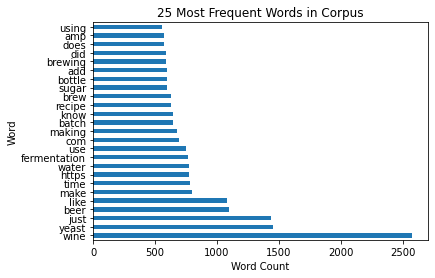

In [301]:
X_train_df.sum().sort_values(ascending = False).head(25).plot(kind='barh')
plt.title('25 Most Frequent Words in Corpus')
plt.xlabel('Word Count')
plt.ylabel('Word');

### Checking Baseline Accuracy
#### Interpretation of baseline (below)
* Randomly guessing that a post is from Homebrewing would be right about 55% of the time. 


In [302]:
y_test.value_counts(normalize = True)

Homebrewing    0.549961
winemaking     0.450039
Name: subreddit, dtype: float64

### 2 Stage Pipeline with Count Vectorizer and Naive Bayes Estimator
#### So that I may use GridSearch On Count Vectorizer Hyperparameters

In [330]:
X2 = posts_df['selftext']
y2 = posts_df['subreddit']

In [331]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, 
                                                   test_size = .30, 
                                                   stratify = y, 
                                                   random_state = 42)

In [332]:
pipe = Pipeline([
    ('cvec', CountVectorizer()), 
    ('nb', MultinomialNB())
])

Create parameters for GridSearchCV

In [333]:
pipe_params = {'cvec__max_features': [3_000, 5_000, 10_000, 20_000],
               'cvec__max_df' : [.98, .99],
               'cvec__min_df' : [2,3],
               'cvec__stop_words' : [None, 'english']}
#                'cvec__ngram_range' : [1, 2]}

In [334]:
# Instantiate Grid Search CV
gs = GridSearchCV(pipe, 
                 pipe_params, 
                 cv = 4, 
                 verbose = 5, 
                 n_jobs = 4)

In [335]:
# Fit Gridsearch to training data. 
gs.fit(X2_train, y2_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   29.6s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   46.0s
[Parallel(n_jobs=4)]: Done 128 out of 128 | elapsed:  1.0min finished


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=4,
             param_grid={'cvec__max_df': [0.98, 0.99],
                         'cvec__max_features': [3000, 5000, 10000, 20000],
                         'cvec__min_df': [2, 3],
                         'cvec__stop_words': [None, 'english']},
             verbose=5)

Scoring Multinomial Naive Bayes with Grid Search Parameters

In [336]:
print(gs.best_score_)

0.9199597885055522


In [338]:
# Score model on training set
gs.score(X2_train, y2_train)

0.9511790102955828

Model appears to be slightly overfit as the score decreased 4 percentage points but it is still performing well above the baseline. 

In [340]:
# Score model on testing set
gs.score(X2_test, y2_test)

0.9116963594113091